In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

Q1: Load the dataset into python

In [2]:
data = pd.read_csv('titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Q2: Make 'PassengerId' as the index column

In [4]:
data = data.set_index('PassengerId')

In [5]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Q3: Check the basic details of the dataset

In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Q4: Fill in all the missing values present in all the columns in the dataset

In [8]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

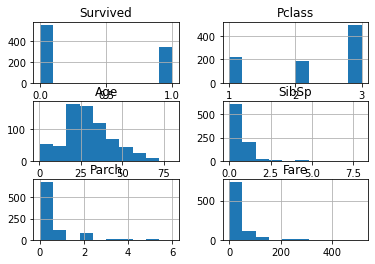

In [9]:
data.hist()

In [10]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [11]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

In [12]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode())

In [13]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

Q5: Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Box plot of SibSp')

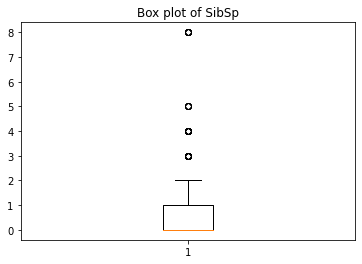

In [14]:
# Checking for Outliers in SibSp column
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

In [15]:
Q1 = np.percentile(data['SibSp'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['SibSp'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['SibSp'], 75, interpolation = 'midpoint')

In [16]:
IQR = Q3-Q1
print(Q1,Q2,Q3)

0.0 0.0 1.0


In [17]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [18]:
low_lim

-1.5

In [19]:
up_lim

2.5

In [20]:
outlier = []
for x in data['SibSp']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [21]:
#to find the index of the outliers
ind1 = data['SibSp']>up_lim
data.loc[ind1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [22]:
data.drop([8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864], inplace = True)

Text(0.5, 1.0, 'BOXPLOT OF SibSp')

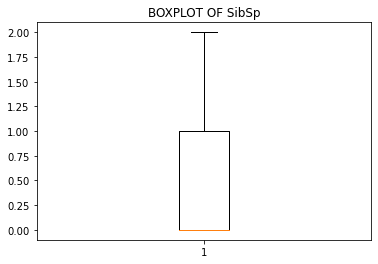

In [23]:
plt.boxplot(data['SibSp'])
plt.title('BOXPLOT OF SibSp')

Text(0.5, 1.0, 'Box plot of Fare')

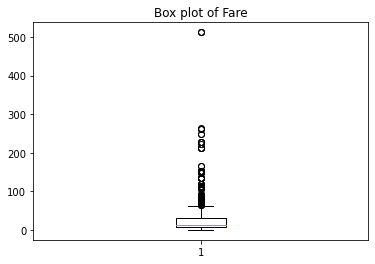

In [24]:
# Checking for Outliers in Ticket column
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

In [25]:
Q1_Fare = np.percentile(data['Fare'], 25, interpolation = 'midpoint')
Q2_Fare = np.percentile(data['Fare'], 50, interpolation = 'midpoint')
Q3_Fare = np.percentile(data['Fare'], 75, interpolation = 'midpoint')

In [26]:
IQR_Fare = Q3_Fare-Q1_Fare
print(Q1_Fare,Q2_Fare,Q3_Fare)

7.8958 13.0 30.0


In [27]:
low_lim_Fare = Q1-1.5*IQR_Fare
up_lim_Fare = Q3+1.5*IQR_Fare

In [28]:
low_lim_Fare

-33.1563

In [29]:
up_lim_Fare

34.1563

In [30]:
outlier = []
for x in data['Fare']:
    if((x>up_lim_Fare) or (x<low_lim_Fare)):
        outlier.append(x)
outlier

[71.2833,
 53.1,
 51.8625,
 35.5,
 146.5208,
 82.1708,
 52.0,
 41.5792,
 76.7292,
 61.9792,
 35.5,
 80.0,
 83.475,
 73.5,
 56.4958,
 47.1,
 34.375,
 61.175,
 34.6542,
 63.3583,
 77.2875,
 52.0,
 247.5208,
 73.5,
 77.2875,
 53.1,
 79.2,
 36.75,
 34.375,
 66.6,
 61.3792,
 55.0,
 56.4958,
 39.0,
 50.0,
 146.5208,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 52.5542,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 56.9292,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 57.9792,
 153.4625,
 133.65,
 66.6,
 134.5,
 35.5,
 35.0,
 55.0,
 75.25,
 69.3,
 55.4417,
 135.6333,
 82.1708,
 211.5,
 227.525,
 52.0,
 73.5,
 120.0,
 113.275,
 90.0,
 55.9,
 120.0,
 34.375,
 263.0,
 81.8583,
 89.1042,
 51.8625,
 38.5,
 52.0,
 91.0792,
 90.0,
 49.5042,
 78.2667,
 151.55,
 86.5,
 108.9,
 56.4958,
 59.4,
 93.5,
 57.9792,
 221.7792,
 106.425,
 49.5,
 71.0,
 106.425,
 36.75,
 110.8833,
 39.6,
 227.525,
 79.65,
 51.4792,
 55.9

In [31]:
#to find the index of the outliers
ind2 = (data['Fare']>up_lim_Fare)
e = data.loc[ind2].index

In [32]:
e

Int64Index([  2,   4,   7,  24,  32,  35,  36,  44,  53,  55,
            ...
            828, 830, 836, 839, 850, 854, 857, 868, 872, 880],
           dtype='int64', name='PassengerId', length=184)

In [33]:
data.drop((e), inplace = True)

Text(0.5, 1.0, 'BOXPLOT OF Fare')

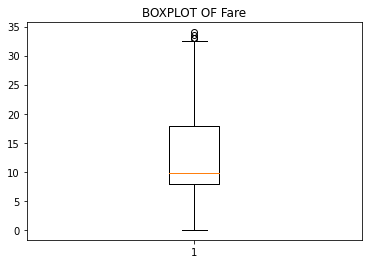

In [34]:
plt.boxplot(data['Fare'])
plt.title('BOXPLOT OF Fare')

Text(0.5, 1.0, 'Box plot of Age')

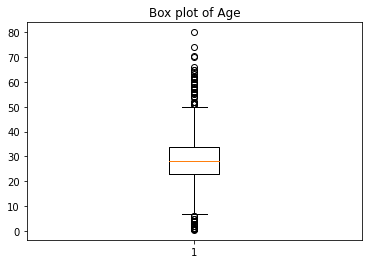

In [35]:
# Checking for Outliers in Age column
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [36]:
Q1_Age = np.percentile(data['Age'], 25, interpolation = 'midpoint')
Q2_Age = np.percentile(data['Age'], 50, interpolation = 'midpoint')
Q3_Age = np.percentile(data['Age'], 75, interpolation = 'midpoint')

In [37]:
IQR_Age = Q3_Age-Q1_Age
print(Q1_Age,Q2_Age,Q3_Age)

23.0 28.0 34.0


In [38]:
low_lim_Age = Q1-1.5*IQR_Age
up_lim_Age = Q3+1.5*IQR_Age

In [39]:
low_lim_Age

-16.5

In [40]:
up_lim_Age

17.5

In [41]:
outlier = []
for x in data['Age']:
    if((x>up_lim_Age) or (x<low_lim_Age)):
        outlier.append(x)
outlier

[22.0,
 26.0,
 35.0,
 28.0,
 27.0,
 58.0,
 20.0,
 39.0,
 55.0,
 28.0,
 31.0,
 28.0,
 35.0,
 34.0,
 38.0,
 28.0,
 28.0,
 28.0,
 40.0,
 28.0,
 66.0,
 28.0,
 21.0,
 18.0,
 40.0,
 27.0,
 28.0,
 19.0,
 28.0,
 28.0,
 28.0,
 28.0,
 18.0,
 21.0,
 29.0,
 21.0,
 28.5,
 22.0,
 28.0,
 28.0,
 29.0,
 19.0,
 26.0,
 32.0,
 26.0,
 25.0,
 28.0,
 28.0,
 30.0,
 22.0,
 29.0,
 28.0,
 28.0,
 24.0,
 29.0,
 20.0,
 26.0,
 59.0,
 28.0,
 34.0,
 34.0,
 28.0,
 28.0,
 33.0,
 37.0,
 28.0,
 21.0,
 28.0,
 38.0,
 28.0,
 22.0,
 20.0,
 21.0,
 70.5,
 29.0,
 28.0,
 32.5,
 32.5,
 28.0,
 24.0,
 28.0,
 45.0,
 33.0,
 20.0,
 47.0,
 29.0,
 25.0,
 23.0,
 19.0,
 28.0,
 22.0,
 24.0,
 19.0,
 18.0,
 27.0,
 36.5,
 42.0,
 51.0,
 55.5,
 40.5,
 28.0,
 30.0,
 28.0,
 44.0,
 40.0,
 26.0,
 45.0,
 28.0,
 61.0,
 21.0,
 56.0,
 18.0,
 50.0,
 30.0,
 36.0,
 28.0,
 28.0,
 45.0,
 40.0,
 36.0,
 32.0,
 19.0,
 19.0,
 44.0,
 28.0,
 42.0,
 28.0,
 24.0,
 28.0,
 34.0,
 45.5,
 18.0,
 32.0,
 26.0,
 40.0,
 24.0,
 35.0,
 22.0,
 30.0,
 28.0,
 27.0,
 42.0,
 30.0,

In [42]:
#to find the index of the outliers
ind3 = (data['Age']>up_lim_Fare)
e3 = data.loc[ind3].index

In [43]:
e3

Int64Index([  5,  12,  14,  16,  21,  26,  31,  34,  41,  95,
            ...
            846, 848, 852, 855, 858, 861, 863, 866, 874, 886],
           dtype='int64', name='PassengerId', length=153)

In [44]:
data.drop((e3), inplace = True)

Text(0.5, 1.0, 'BOXPLOT OF Age')

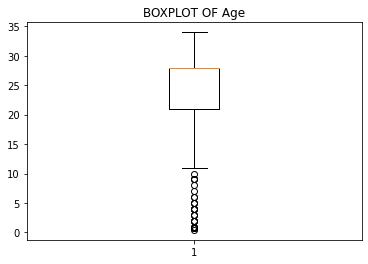

In [45]:
plt.boxplot(data['Age'])
plt.title('BOXPLOT OF Age')

Q6: Do min max scaling on the feature set (Take survived as target)

In [46]:
from sklearn import preprocessing
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,508.00000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,0.34252,2.679134,24.256398,0.255906,0.216535,12.476983
std,0.47502,0.559478,7.102550,0.496004,0.555022,7.065308
min,0.00000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.00000,2.000000,21.000000,0.000000,0.000000,7.775000
50%,0.00000,3.000000,28.000000,0.000000,0.000000,8.662500
75%,1.00000,3.000000,28.000000,0.000000,0.000000,15.500000
max,1.00000,3.000000,34.000000,2.000000,4.000000,33.000000


In [47]:
min_max = preprocessing.MinMaxScaler(feature_range = (0,1))

In [48]:
d = min_max.fit_transform(data[['Survived']])

In [49]:
d = pd.DataFrame(d)
d.describe()

,0
count,508.00000
mean,0.34252
std,0.47502
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [50]:
d

,0
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
503,0.0
504,1.0
505,0.0
506,1.0
